# 牛顿插值

## 均差（商差）

$f[x_0,x_k]=\frac{f(x_k)-f(x_0)}{x_k-x_0}$ 为函数$f(x)$关于点$x_0,x_k$的一阶均差。一般地，称

$$

f[x_0,x_1,...,x_k]=\frac{f[x_0,...,x_k-2,x_k]-f[x_0,x_1,...,x_{k-1}]}{x_k-x_{k-1}}

$$

均差有以下性质

$$

\begin{gather*}

f[x_0,x_1,...,x_k]=\sum_{j=0}^{k} \frac{f(x_j)}{(x_j-x_0)...(x_j-x_{j-1})(x_j-x_{j+1})...(x_j-x_k)}  \\\\

f[x_0,x_1,...,x_k]=\frac{f[x_1,x_2,...,x_k] - f[x_0,x_1,...,x_{k-1}]}{x_k-x_0}

\end{gather*}

$$

## 牛顿插值多项式

$$

P_n(x)=f(x_0)+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_0)(x-x_1)+...+f[x_0,x_1,...,x_n](x-x_0)...(x-x_{n-1})

$$


In [4]:
# 均差
def get_d(points: list[list[float]]):
    n = len(points)
    l = n

    # dp[i][j] 表示从i到j的 j-i+1阶均差
    dp = [[0 for _ in range(l)] for _ in range(l)]

    for _i in range(l):
        i = l - _i - 1
        for j in range(l):
            if i >= j:
                continue
            elif i + 1 == j:
                dp[i][j] = (points[j][1] - points[i][1]) / (points[j][0] - points[i][0])
            else:
                dp[i][j] = (dp[i + 1][j] - dp[i][j - 1]) / (points[j][0] - points[i][0])


    return dp

def newton_p(points: list[list[float]]):
    def p(x: float):
        n = len(points)
        dp = get_d(points)

        res = points[0][1]
        w = 1

        for i in range(1, n):
            w *= (x - points[i - 1][0])
            res += w * dp[0][i]
        return res

    return p


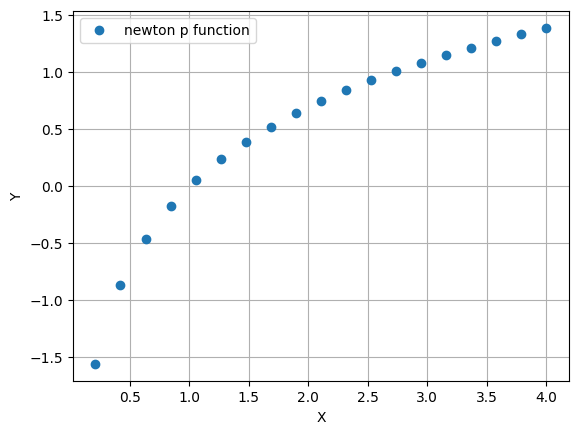

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 4, 20)[1:]
y = np.log(x)

points = [[float(xi), float(yi)] for xi, yi in zip(x, y)]

p = newton_p(points)
p_f = np.vectorize(p)

y_1 = p_f(x)

plt.plot(x, y_1, 'o', label='newton p function')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()
plt.show()